In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [81]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)) 
x = sc.fit_transform(x)

In [82]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15)
som.random_weights_init(x)
som.train_random(x, num_iteration = 100)

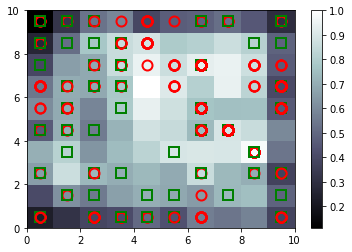

In [83]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, j in enumerate(x):
    w = som.winner(j)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = "None",
         markersize = 10,
         markeredgewidth = 2)
show()

In [90]:
mappings = som.win_map(x)
frauds = np.concatenate((mappings[(8, 3)], mappings[(6, 7)]), axis = 0)
frauds = sc.inverse_transform(frauds)